## 2.3.8. 커널 서포트 벡터 머신 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=4, random_state=8)
y = y % 2

Text(0, 0.5, 'feature1')

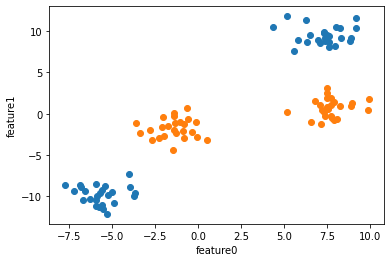

In [32]:
plt.scatter(X[:,0][y==0], X[:,1][y==0])
plt.scatter(X[:,0][y==1], X[:,1][y==1])
plt.xlabel("feature0")
plt.ylabel("feature1")

In [17]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

Text(0, 0.5, 'feature1')

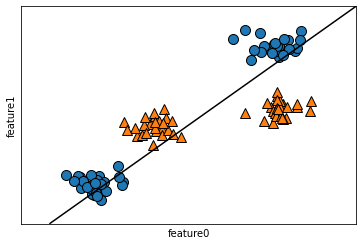

In [39]:
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature0")
plt.ylabel("feature1")

2차원 선형 모델으로 나누기 적합하지 않은 데이터

#### 3차원 데이터

특성1을 제곱하여 새로운 3번째 데이터 생성

In [61]:
X_new = np.hstack([X, X[:,1:]**2])
X_new.shape

(100, 3)

Text(0.5, 0, 'feat 1^2')

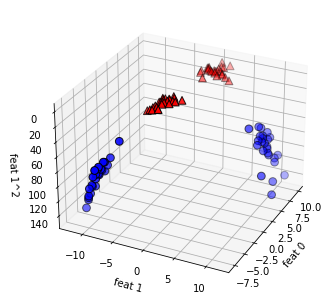

In [79]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure() #그래프 틀 생성
ax = Axes3D(figure, elev=-152, azim=-26)

# y==0인 포인트 먼저 생성
mask = y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolors='k')
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feat 0")
ax.set_ylabel("feat 1")
ax.set_zlabel("feat 1^2")

Text(0.5, 0, 'feat 1^2')

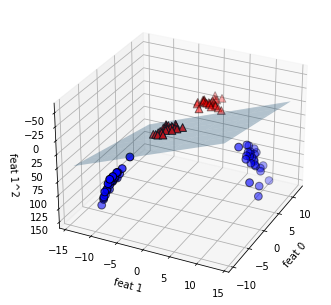

In [145]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
#선형 결정 경계 그리기

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

mask = y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolors='k')
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feat 0")
ax.set_ylabel("feat 1")
ax.set_zlabel("feat 1^2")

위 모델을 원래 특성에 투영

Text(0, 0.5, 'feat 1')

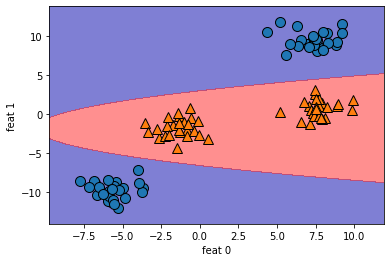

In [166]:
ZZ = YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feat 0")
plt.ylabel("feat 1")

#### SVM 이해하기

Text(0, 0.5, 'feat 1')

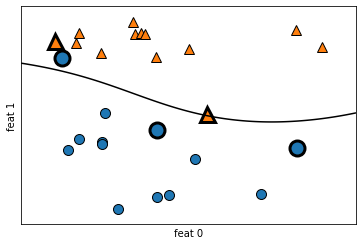

In [172]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #데이터 포인터

sv = svm.support_vectors_ #서포트 벡터
sv_labels = svm.dual_coef_.ravel() > 0 #dual_coef_의 부호에 따라 class 레이블 결정

mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feat 0")
plt.ylabel("feat 1")

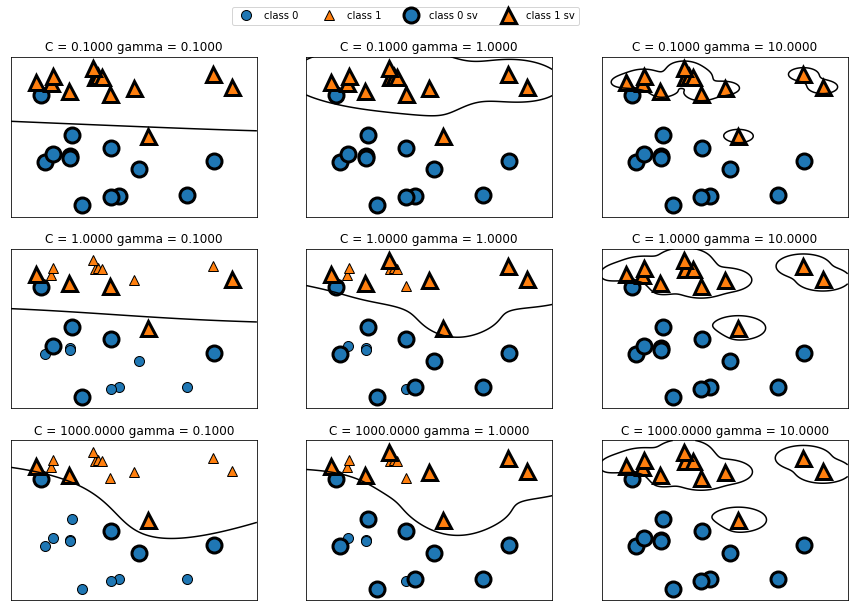

In [173]:
fit, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0 ,3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(["class 0", "class 1", "class 0 sv", "class 1 sv"], ncol=4, loc=(.9, 1.2))

In [175]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state=0)
svc = SVC()
svc.fit(X_train, y_train)

print("train set acc : {:.3f}".format(svc.score(X_train, y_train)))
print("test set acc : {:.3f}".format(svc.score(X_test, y_test)))

train set acc : 0.904
test set acc : 0.937


train set이 test set보다 낮은 정확도를 보이는 과소적합 모델

Text(0, 0.5, 'feature size')

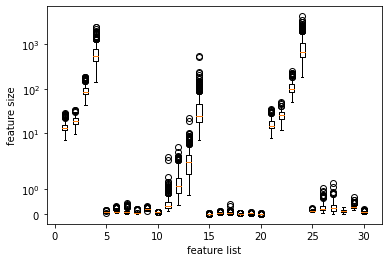

In [178]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("feature list")
plt.ylabel("feature size")

In [181]:
# 훈련세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0, 최댓값은 1이다.
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [184]:
# 테스트세트에도 같은 작업을 하지만 범위는 훈련세트의 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

In [186]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("train set acc : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("test set acc : {:.3f}".format(svc.score(X_test_scaled, y_test)))

train set acc : 0.984
test set acc : 0.972


데이터 스케일 조정을 통해 과소적합 해소

#### C, gamma값 조정

In [187]:
svc = SVC(C=20)

svc.fit(X_train_scaled, y_train)
print("train set acc : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("test set acc : {:.3f}".format(svc.score(X_test_scaled, y_test)))

train set acc : 0.988
test set acc : 0.979
